In [1]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.dates as mdates
import pickle

dir_name = "ridgecrest"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)
root_dir = lambda x: os.path.join(dir_name, x)

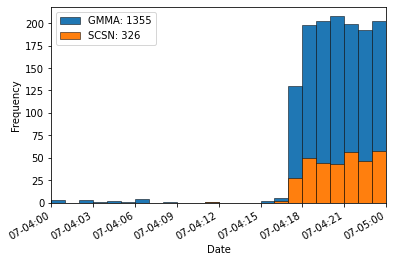

In [2]:
with open(root_dir("config.pkl"), "rb") as fp:
    config = pickle.load(fp)
    
stations = pd.read_csv(root_dir("stations.csv"), delimiter="\t")
events = pd.read_csv(root_dir("events.csv"), delimiter="\t")
events["time"] = events["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%f"))

catalog = pd.read_csv(root_dir("catalog.csv"), delimiter="\t")
catalog["time"] = catalog["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%f"))
catalog["covariance"] = catalog["covariance"].apply(lambda x: [float(i) for i  in x.split(",")])

plt.figure()
plt.hist(catalog["time"], range=(config["starttime"], config["endtime"]), bins=24, edgecolor="k", alpha=1.0, linewidth=0.5, label=f"GMMA: {len(catalog['time'])}")
plt.hist(events["time"], range=(config["starttime"], config["endtime"]), bins=24, edgecolor="k", alpha=1.0, linewidth=0.5, label=f"SCSN: {len(events['time'])}")
plt.ylabel("Frequency")
plt.xlabel("Date")
plt.gca().autoscale(enable=True, axis='x', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d:%H'))
plt.gcf().autofmt_xdate()
plt.legend()
plt.savefig(root_dir("earthquake_number.png"), bbox_inches="tight", dpi=300)
plt.savefig(root_dir("earthquake_number.pdf"), bbox_inches="tight")
plt.show()

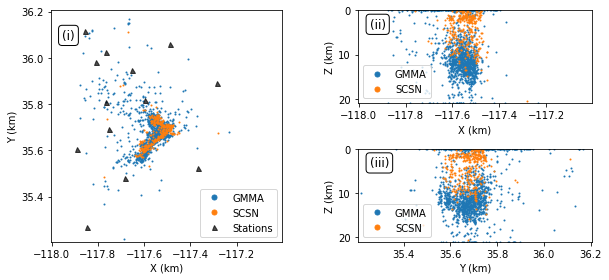

In [3]:
fig = plt.figure(figsize=plt.rcParams["figure.figsize"]*np.array([1.5,1]))
box = dict(boxstyle='round', facecolor='white', alpha=1)
text_loc = [0.05, 0.92]
grd = fig.add_gridspec(ncols=2, nrows=2, width_ratios=[1.5,1], height_ratios=[1,1])
fig.add_subplot(grd[:, 0])
plt.plot(catalog["longitude"], catalog["latitude"], '.',markersize=2, alpha=1.0)
plt.plot(events["longitude"], events["latitude"], '.', markersize=2, alpha=1.0)
plt.axis("scaled")
plt.xlim(config["xlim_degree"])
plt.ylim(config["ylim_degree"])
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.gca().set_prop_cycle(None)
plt.plot(config["xlim_degree"][0]-10, config["ylim_degree"][0]-10, '.', markersize=10, label=f"GMMA")
plt.plot(config["xlim_degree"][0]-10, config["ylim_degree"][0]-10, '.', markersize=10, label=f"SCSN")
plt.plot(stations["longitude"], stations["latitude"], 'k^', markersize=5, alpha=0.7, label="Stations")
plt.legend(loc="lower right")
plt.text(text_loc[0], text_loc[1], '(i)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontsize="large", fontweight="normal", bbox=box)

fig.add_subplot(grd[0, 1])
plt.plot(catalog["longitude"], catalog["depth(m)"]/1e3, '.', markersize=2, alpha=1.0)
plt.plot(events["longitude"], events["depth(m)"]/1e3, '.', markersize=2, alpha=1.0)
# plt.axis("scaled")
plt.xlim(config["xlim_degree"])
plt.ylim([0,21])
plt.gca().invert_yaxis()
plt.xlabel("X (km)")
plt.ylabel("Z (km)")
plt.gca().set_prop_cycle(None)
plt.plot(config["xlim_degree"][0]-10, 31, '.', markersize=10, label=f"GMMA")
plt.plot(31, 31, '.', markersize=10, label=f"SCSN")
plt.legend(loc="lower left")
plt.text(text_loc[0], text_loc[1], '(ii)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontsize="large", fontweight="normal", bbox=box)

fig.add_subplot(grd[1, 1])
plt.plot(catalog["latitude"], catalog["depth(m)"]/1e3, '.', markersize=2, alpha=1.0)
plt.plot(events["latitude"], events["depth(m)"]/1e3, '.', markersize=2, alpha=1.0)
# plt.axis("scaled")
plt.xlim(config["ylim_degree"])
plt.ylim([0,21])
plt.gca().invert_yaxis()
plt.xlabel("Y (km)")
plt.ylabel("Z (km)")
plt.gca().set_prop_cycle(None)
plt.plot(config["ylim_degree"][0]-10, 31, '.', markersize=10, label=f"GMMA")
plt.plot(31, 31, '.', markersize=10, label=f"SCSN")
plt.legend(loc="lower left")
plt.tight_layout()
plt.text(text_loc[0], text_loc[1], '(iii)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontsize="large", fontweight="normal", bbox=box)
plt.savefig(root_dir("earthquake_location.png"), bbox_inches="tight", dpi=300)
plt.savefig(root_dir("earthquake_location.pdf"), bbox_inches="tight")
plt.show()

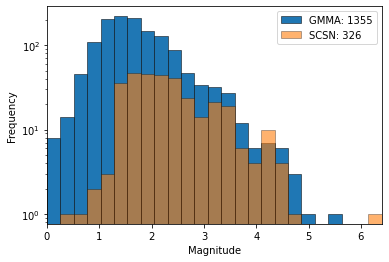

In [4]:
plt.figure()
plt.hist(catalog["magnitude"], range=(0., events["magnitude"].max()), bins=25, alpha=1.0,  edgecolor="k", linewidth=0.5, label=f"GMMA: {len(catalog['magnitude'])}")
plt.hist(events["magnitude"], range=(0., events["magnitude"].max()), bins=25, alpha=0.6,  edgecolor="k", linewidth=0.5, label=f"SCSN: {len(events['magnitude'])}")
plt.legend()
# plt.figure()
plt.xlim([0,events["magnitude"].max()])
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.gca().set_yscale('log')
plt.savefig(root_dir("earthquake_magnitude_frequency.png"), bbox_inches="tight", dpi=300)
plt.savefig(root_dir("earthquake_magnitude_frequency.pdf"), bbox_inches="tight")
plt.show()

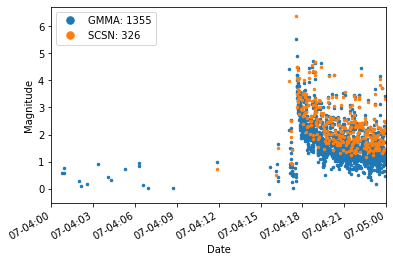

In [5]:
plt.figure()
plt.plot(catalog["time"], catalog["magnitude"], '.', markersize=5, alpha=1.0)
plt.plot(events["time"], events["magnitude"], '.', markersize=5, alpha=1.0)
plt.xlim(config["starttime"], config["endtime"])
ylim = plt.ylim()
plt.ylabel("Magnitude")
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d:%H'))
plt.gcf().autofmt_xdate()
plt.gca().set_prop_cycle(None)
plt.plot(config["starttime"], -10, '.', markersize=15, alpha=1.0, label=f"GMMA: {len(catalog['magnitude'])}")
plt.plot(config["starttime"], -10, '.', markersize=15, alpha=1.0, label=f"SCSN: {len(events['magnitude'])}")
plt.legend()
plt.ylim(ylim)
plt.savefig(root_dir("earthquake_magnitude_time.png"), bbox_inches="tight", dpi=300)
plt.savefig(root_dir("earthquake_magnitude_time.pdf"), bbox_inches="tight")
plt.show()

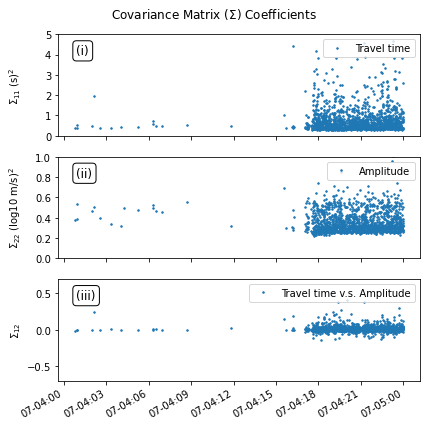

In [6]:
covariance = np.array(catalog["covariance"].to_list())

fig = plt.figure(figsize=plt.rcParams["figure.figsize"]*np.array([1,1.5]))
box = dict(boxstyle='round', facecolor='white', alpha=1)
text_loc = [0.05, 0.90]
plt.subplot(311)
plt.plot(catalog["time"], covariance[:,0], '.', markersize=3.0, label="Travel time")
plt.ylim([0, 5])
plt.ylabel(r"$\Sigma_{11}$ (s)$^2$")
plt.legend(loc="upper right")
plt.text(text_loc[0], text_loc[1], '(i)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontsize="large", fontweight="normal", bbox=box)
plt.subplot(312)
plt.plot(catalog["time"], covariance[:,1], '.', markersize=3.0, label=r"Amplitude")
plt.ylim([0, 1])
plt.ylabel(r"$\Sigma_{22}$ ($\log10$ m/s)$^2$")
plt.legend(loc="upper right")
plt.text(text_loc[0], text_loc[1], '(ii)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontsize="large", fontweight="normal", bbox=box)
plt.subplot(313)
plt.plot(catalog["time"], covariance[:,2], '.', markersize=3.0, label="Travel time v.s. Amplitude")
plt.ylabel(r"$\Sigma_{12}$")
plt.ylim([-0.7, 0.7])
plt.legend(loc="upper right")
plt.text(text_loc[0], text_loc[1], '(iii)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontsize="large", fontweight="normal", bbox=box)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d:%H'))
plt.gcf().autofmt_xdate()
plt.suptitle(r"Covariance Matrix ($\Sigma$) Coefficients")
plt.tight_layout()
plt.gcf().align_labels()
plt.savefig(root_dir("covariance.png"), bbox_inches="tight", dpi=300)
plt.savefig(root_dir("covariance.pdf"), bbox_inches="tight")

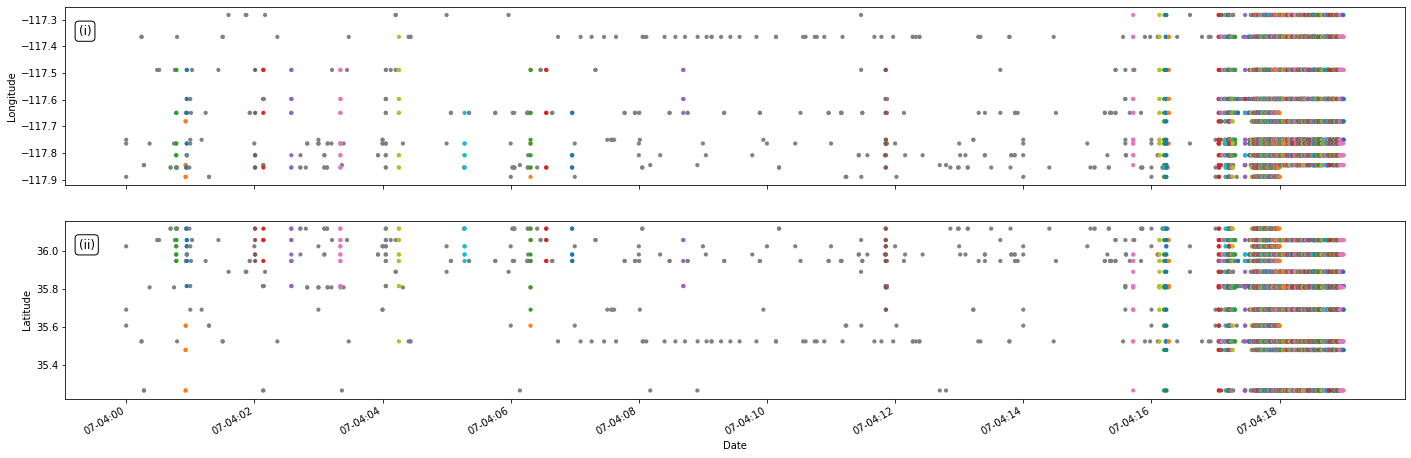

In [9]:
picks = pd.read_csv(root_dir("picks.csv"), delimiter="\t")
picks["timestamp"] = picks["timestamp"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%f"))
max_num = 5000
picks = picks.iloc[:max_num]
stations["id"] = stations["station"]
stations = stations.set_index("id")
picks = picks.join(stations, on="id")
picks["color"] = picks["event_idx"].apply(lambda x: f"C{x}" if x!= -1 else "grey")

text_loc = [0.01, 0.90]
fig = plt.figure(figsize=plt.rcParams["figure.figsize"]*np.array([4,2]))
plt.subplot(211)
plt.scatter(picks["timestamp"], picks["longitude"], c=picks["color"], s=10)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d:%H'))
plt.gcf().autofmt_xdate()
plt.ylabel("Longitude")
plt.xlabel("Date")
plt.text(text_loc[0], text_loc[1], '(i)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontsize="large", fontweight="normal", bbox=box)
plt.subplot(212)
plt.scatter(picks["timestamp"], picks["latitude"], c=picks["color"], s=10)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d:%H'))
plt.gcf().autofmt_xdate()
plt.ylabel("Latitude")
plt.xlabel("Date")
plt.text(text_loc[0], text_loc[1], '(ii)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontsize="large", fontweight="normal", bbox=box)
plt.savefig(root_dir(f"picks_{max_num}.png"), bbox_inches="tight", dpi=300)
# plt.savefig(root_dir(f"picks_{max_num}.pdf"), bbox_inches="tight")
plt.show()